In [5]:
using Plots

This notebook will cover two straightforward algorithms for approximately minimizing one-dimensional functions: *grid search* and *random search*. Both are used extensively in, for example, machine learning to find optimal hyperparameters. These two algorithms are ideal to get acquainted with the basics of Julia!

# Grid search

To minimize a one-dimensional function $f(x)$ using grid search in the interval $[a, b]$, we search the interval over $n$ equally-spaced steps and take value that results in the lowest objective value. The larger $n$, the more function evaluations and the better quality the solution will be. Even though grid search being ubiquitously used in machine learning, it is a biased method and often does not yield as good results as the random search. In some cases, it makes sense to search on a logarithmic scale as opposed to a linear scale. 

Grid search can easily be extended to higher dimensions by extending the grid $a_i\le x_i \le b_j$, hence providing upper and lower bounds for every dimension. This approach is also called a *full factorial sampling*. Due to the curse of dimensionality, one has to perform exponentially more function evaluations to cover the search space. 

# Random search

To minimize a one-dimensional function $f(x)$ using random search, we generate $n$ random values of $x$ in the interval $[a, b]$ and take the one with the lowest objective value. Clever algorithms use other samplings than uniform, driving the search towards particular regions of the search space. Random search can easily be extended to higher dimensions.

# Exercises

We will explore both methods using the [Ackley alpine function](https://en.wikipedia.org/wiki/Ackley_function). We will search between the interval $[-π, π]$. The true minimizer is $x^\star=0$

In [1]:
using STMO.TestFuns: ackley

ackley(1.0)  # scalar version
ackley([1.0, -1.0])  # optional 2D version

plot(ackley, -pi, pi, label="Ackley")

LoadError: UndefVarError: plot not defined

**Assignments**
1. Complete the code `grid_search` and use it to minimize the Ackley function using 10 and 50 function evaluations. (hint: use `:` to generate a grid, e.g. `0:0.1:10`)
2. Complete the code `random_search` and use it to minimize the Ackley function using 50 function evaluations. (hint `rand()` generates an uniform random number in $[0,1]$.
3. Compare the solutions.
4. Compare their running time using the `@time` macro.
5. Plot the quality of your solution using the two algorithms as a function of the number of evaluations (use $n=10, 50, 100, 500, 1000, 5000$ or so). 
6. (optional programming exercise) Extend the functions so that you can perform a higher-dimensional search. E.g., `grid_search(Ackley, (-pi, pi), (-pi, pi))` would search in two dimensions.
7. (optional exercise) Use dispatch such that there are two versions for grid search, i.e., `grid_search(f, (a, b); n=10)` works as before, but the second method `grid_search(f, grid::Vector)` recognizes that the grid is already given.

Can you see why I suggested the interval $[-π, π]$? I have been sneaky in question 5...

In [2]:
"""
    grid_search(f, (a, b); n=10)

Performs a grid search in [`a`, `b`] on `f` with a grid of size `n`.
Returns the best found value of `x`.
"""
function grid_search(f, (a, b); n=10)
    @assert a < b "Not a valid interval!"
    ybest = Inf
    xbest = 0.0
    for x in range(a,b,length=n) # you can do it!
        y =  f(x)
        if y < ybest
            ybest = y
            xbest = x
        end
    end
return(xbest,ybest)
end

grid_search

In [3]:
xbest,ybest=grid_search(ackley, (-10, 10); n=100)

(-0.10101010101010101, -21.837314532052442)

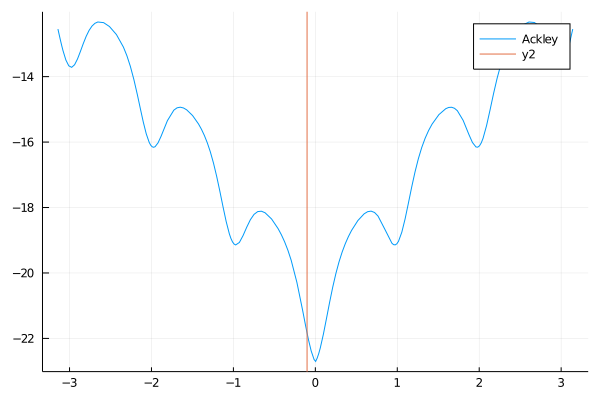

In [6]:
plot(ackley, -pi, pi, label="Ackley")
vline!([xbest])

In [32]:
"""
    random_search(f, (a, b); n=10)

Performs a random search in [`a`, `b`] on `f` using `n` samples.
Returns the best found value of `x`.
"""
function random_search(f, (a, b); n=10)
    @assert a < b "Not a valid interval!"
    ybest = Inf # I believe in you!
    xbest = 0.0 
    for i in range(1, stop = n)
        xrandom = rand(a:b)
        yrandom = f(xrandom)
        if yrandom < ybest
            ybest = yrandom 
            xbest = xrandom
        end
    end
return(xbest,ybest)
end

random_search

In [37]:
xbest,ybest=random_search(ackley, (-10, 10); n=100)

(0, -22.718281828459045)

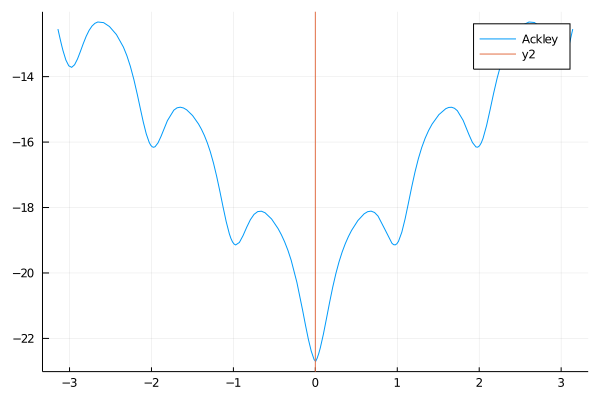

In [38]:
plot(ackley, -pi, pi, label="Ackley")
vline!([xbest])